# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
data = "https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv?raw=true"
df = pd.read_csv(data)

In [4]:
# data = "insurance.csv"
# df = pd.read_csv(data)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **Memahami Struktur Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
num_features = df.select_dtypes(include=['number']).columns.tolist()
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Fitur Numerik:", num_features)
print("Fitur Kategorikal:", cat_features)

Fitur Numerik: ['age', 'bmi', 'children', 'charges']
Fitur Kategorikal: ['sex', 'smoker', 'region']


In [8]:
for var in cat_features:
    print(df[var].value_counts())
    print('\n')

sex
male      676
female    662
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64




In [9]:
df.duplicated().sum()

1

In [10]:
df.shape

(1338, 7)

In [11]:
# Buat DataFrame deskripsi
desc = pd.DataFrame(index=df.columns)
desc['type'] = df.dtypes
desc['count'] = df.count()
desc['nunique'] = df.nunique()
desc['%unique'] = desc['nunique'] / len(df) * 100
desc['null'] = df.isnull().sum()
desc['%null'] = desc['null'] / len(df) * 100

# Gabungkan dengan statistik numerik
desc = pd.concat([desc, df.describe().T.drop('count', axis=1)], axis=1)

# Tambahkan varians
desc['variance'] = df.select_dtypes(include=['number']).var()

# Tambahkan mode (jika lebih dari satu mode, ambil yang pertama)
desc['mode'] = df.mode().iloc[0]

# Styling
desc.sort_values(by=['type', 'null']).style.background_gradient(cmap='YlOrBr')\
    .bar(subset=['mean'], color='green')\
    .bar(subset=['max'], color='red')\
    .bar(subset=['min'], color='pink')


,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max,variance,mode
age,int64,1338,47,3.512706,0,0.000000,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000,197.401387,18
children,int64,1338,6,0.448430,0,0.000000,1.094918,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000,1.453213,0
bmi,float64,1338,548,40.956652,0,0.000000,30.663397,6.098187,15.960000,26.296250,30.400000,34.693750,53.130000,37.187884,32.300000
charges,float64,1338,1337,99.925262,0,0.000000,13270.422265,12110.011237,1121.873900,4740.287150,9382.033000,16639.912515,63770.428010,146652372.152855,1639.563100
sex,object,1338,2,0.149477,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,male
smoker,object,1338,2,0.149477,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,no
region,object,1338,4,0.298954,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,southeast


In [12]:
for col in df.columns:
    print(f"Kolom: {col}")
    print(df[col].unique())  # Menampilkan nilai unik
    print("-" * 50)

Kolom: age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
--------------------------------------------------
Kolom: sex
['female' 'male']
--------------------------------------------------
Kolom: bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.9

### **Menangani Data yang Hilang**

In [13]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print(missing_df)


          Missing Values  Percentage (%)
age                    0             0.0
sex                    0             0.0
bmi                    0             0.0
children               0             0.0
smoker                 0             0.0
region                 0             0.0
charges                0             0.0


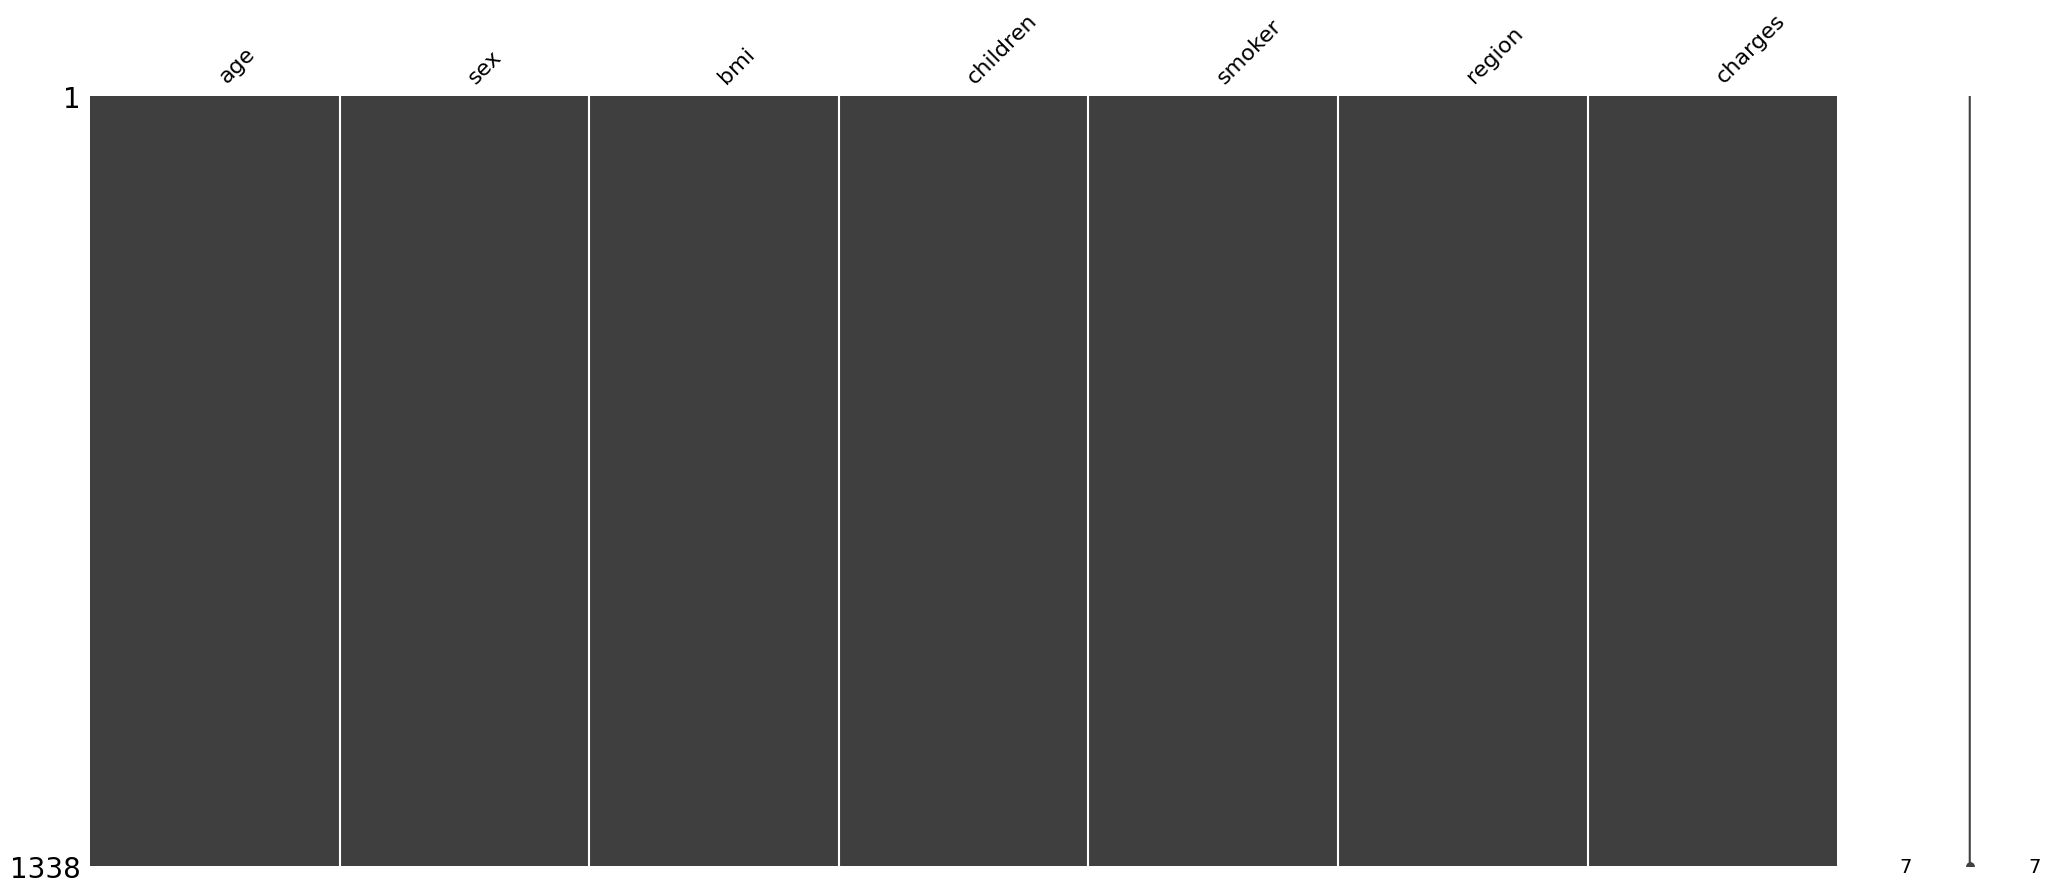

In [14]:
# Visualisasi missing value dalam bentuk heatmap
msno.matrix(df)
plt.show()


### **Analisis Distribusi dan Korelasi**

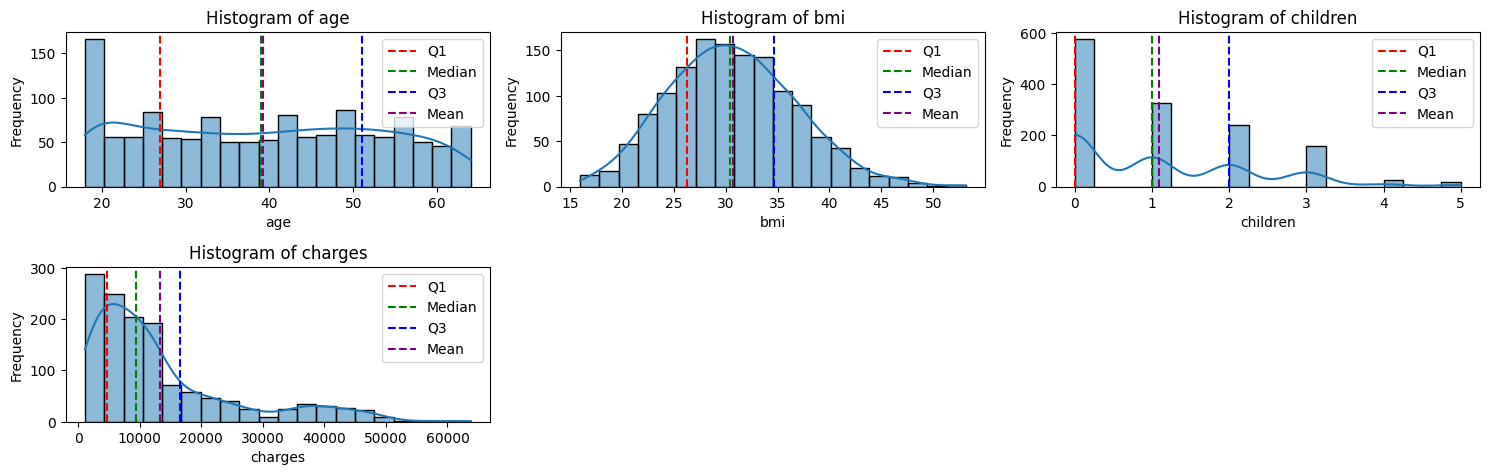

In [15]:
fig, axes = plt.subplots(15, 3, figsize=(15,35)) 
axes = axes.flatten() 

# Loop melalui fitur numerik dan plot di masing-masing subplot
for i, var in enumerate(num_features):
    q1 = df[var].quantile(0.25)
    median = df[var].median()
    q3 = df[var].quantile(0.75)
    mean = df[var].mean()

    sns.histplot(data=df, x=var, bins=20, kde=True, ax=axes[i])

    # Tambahkan garis vertikal untuk Q1, Median, Q3, dan Mean
    axes[i].axvline(q1, color='red', linestyle='--', label='Q1')
    axes[i].axvline(median, color='green', linestyle='--', label='Median')
    axes[i].axvline(q3, color='blue', linestyle='--', label='Q3')
    axes[i].axvline(mean, color='purple', linestyle='--', label='Mean')

    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

for j in range(len(num_features), len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

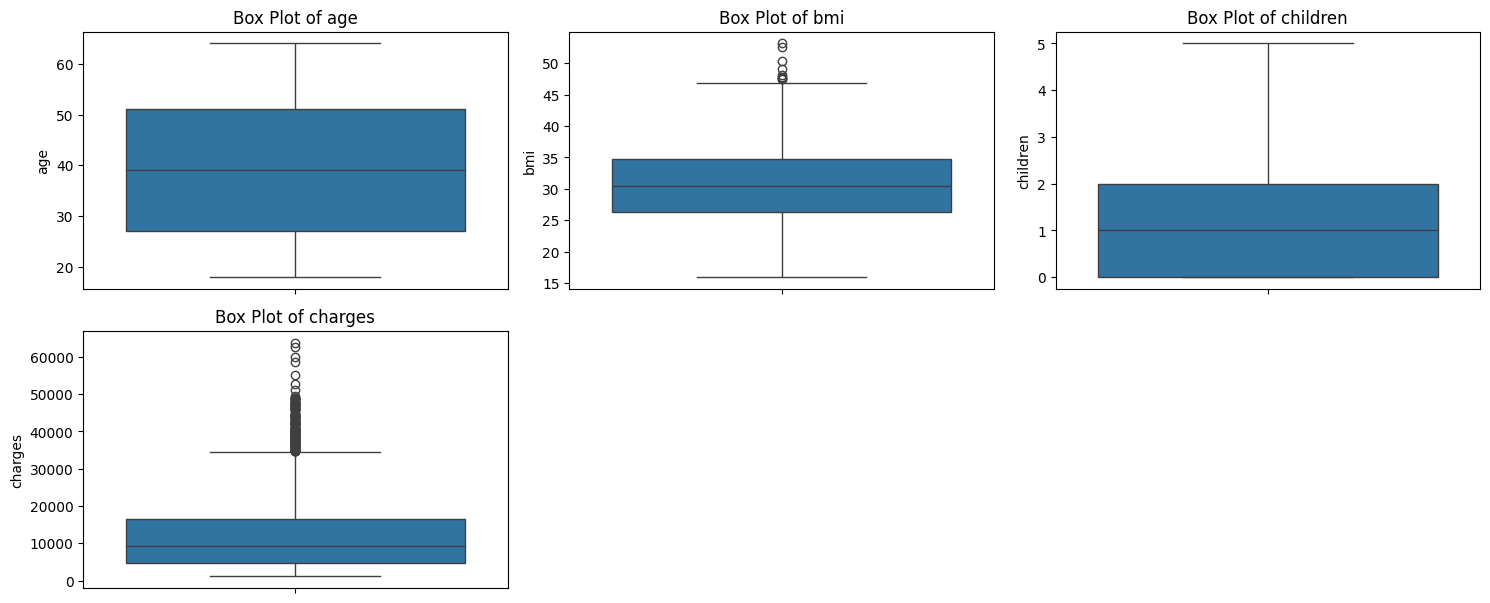

In [16]:
fig, axes = plt.subplots(15, 3, figsize=(15, 45)) 
axes = axes.flatten() 

# Loop melalui fitur numerik dan plot di masing-masing subplot
for i, var in enumerate(num_features):
    sns.boxplot(data=df, y=var, ax=axes[i])
    axes[i].set_title(f'Box Plot of {var}')
    axes[i].set_ylabel(var)
    
for j in range(len(num_features), len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

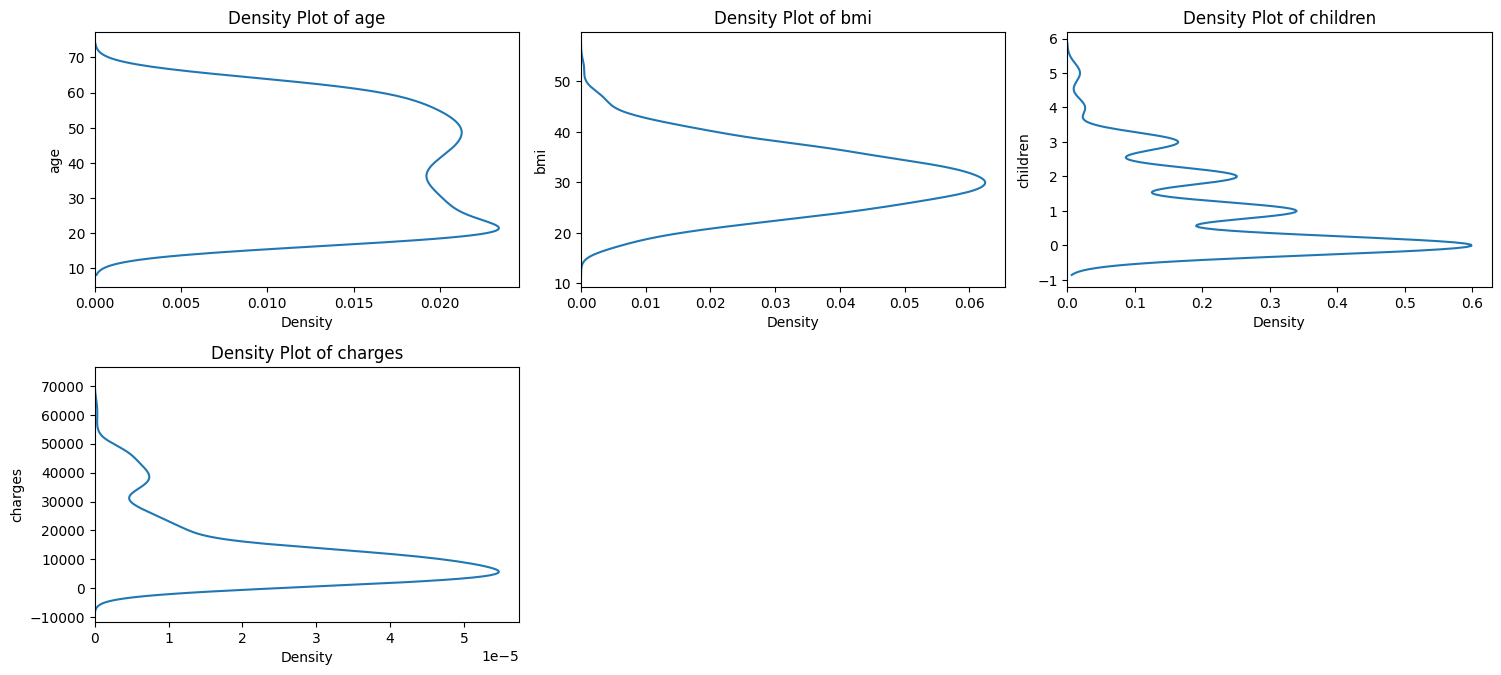

In [17]:
fig, axes = plt.subplots(15, 3, figsize=(15, 50)) 
axes = axes.flatten() 

# Loop melalui fitur numerik dan plot di masing-masing subplot
for i, var in enumerate(num_features):
    sns.kdeplot(data=df, y=var, ax=axes[i])
    axes[i].set_title(f'Density Plot of {var}')
    axes[i].set_ylabel(var)
    
for j in range(len(num_features), len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

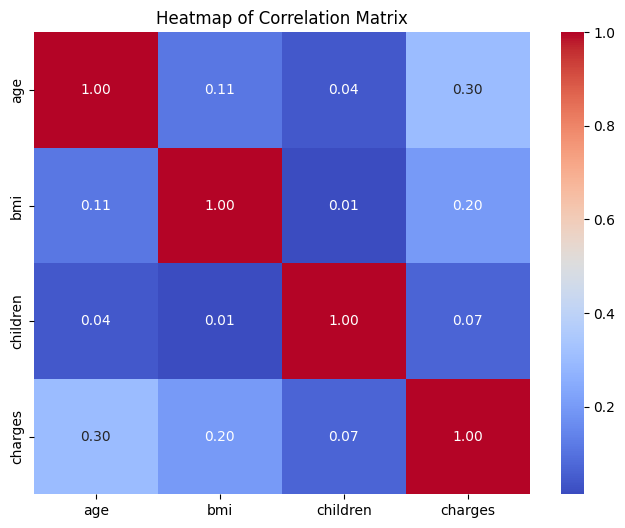

In [18]:
corr_matrix = df[num_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

### **Visualisasi Data**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


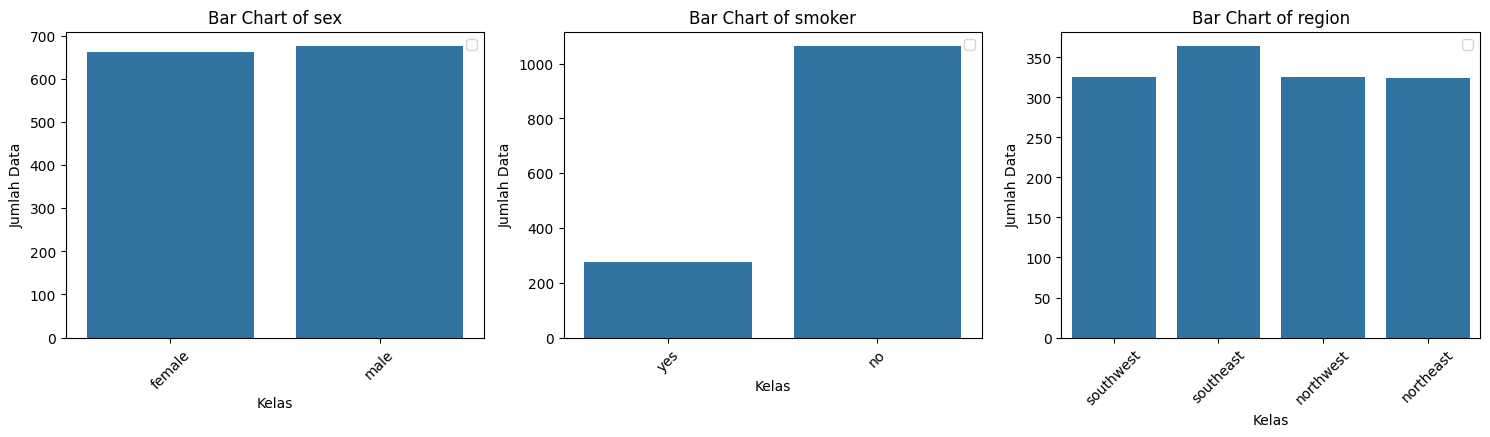

In [19]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20)) 
axes = axes.flatten() 

# Loop melalui fitur kategorik dan plot di masing-masing subplot
for i, var in enumerate(cat_features):
  sns.countplot(data=df, x=var, ax=axes[i])
  axes[i].set_title(f'Bar Chart of {var}')
  axes[i].set_xlabel('Kelas')
  axes[i].set_ylabel('Jumlah Data')
  axes[i].legend()
  axes[i].tick_params(axis='x', rotation=45)
  
for j in range(len(cat_features), len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [20]:
def display_correlation(df, features, name):
    r = df.corr(method="spearman")
    plt.figure(figsize=(12,9))
    pd.options.display.float_format = '{:.2f}'.format
    heatmap = sns.heatmap(df[features].corr(method="spearman"), vmin=-1,
                      vmax=1, annot=True, annot_kws={
                'fontsize': 16})
    plt.title("Spearman Correlation", fontsize=18)
    plt.xticks(fontsize=12, rotation=30)
    plt.yticks(fontsize=12, rotation=30)
    #plt.savefig('./Images/korelasi_spearman_'+name+'.png',bbox_inches='tight',dpi=200)
    return(r)

,age,bmi,children,charges
age,1.00,0.11,0.06,0.53
bmi,0.11,1.00,0.02,0.12
children,0.06,0.02,1.00,0.13
charges,0.53,0.12,0.13,1.00


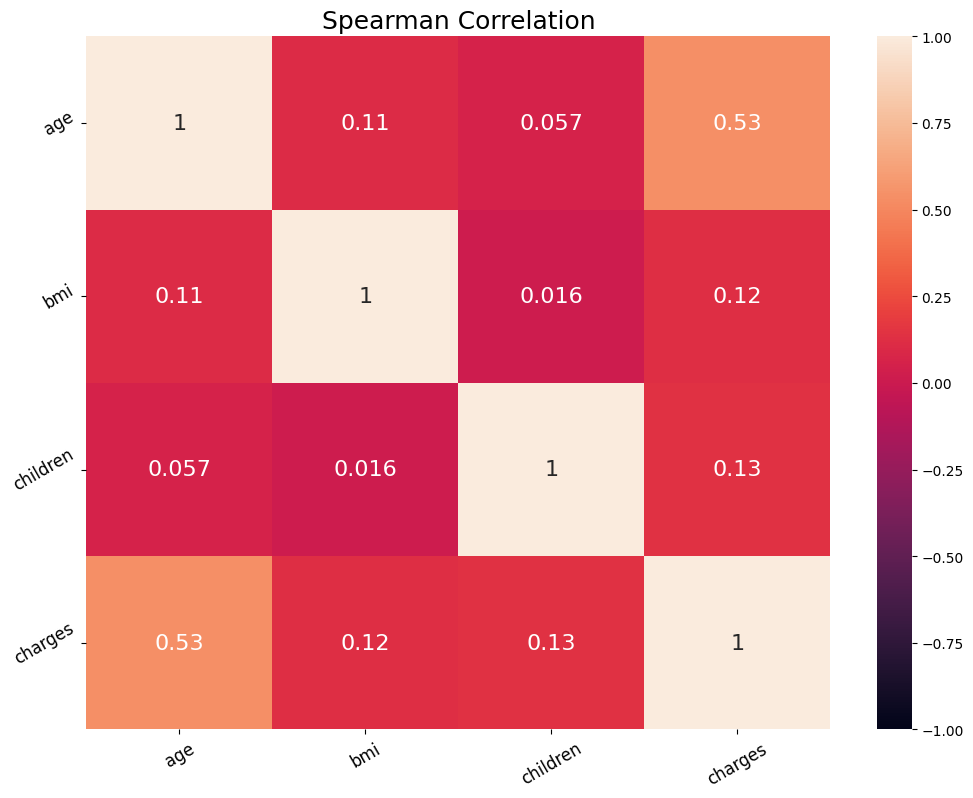

In [21]:
display_correlation(df[num_features], num_features, 'num_feat')

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### **Menghapus atau Menangani Data Kosong (Missing Values)**

In [23]:
# Persentase missing values per kolom
missing_values = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage': missing_values
})
missing_df

,Missing Values,Percentage
age,0,0.00
sex,0,0.00
bmi,0,0.00
children,0,0.00
smoker,0,0.00
region,0,0.00
charges,0,0.00


Tidak ada missing value dalam dataset ini, sehingga tidak dilakukan penanganan terhadap missing value.

### **Menghapus Data Duplikat**

In [24]:
df.duplicated ().sum()  

1

In [25]:
df.drop_duplicates(keep='first', inplace=True)

In [26]:
df.duplicated ().sum()

0

Menghapus baris yang memiliki duplikat dan mempertahankan baris yang pertama.

### **Deteksi dan Penanganan Outlier**

Tidak dilakukan penanganan outlier pada data karena outlier yang dimiliki bukanlah anomali, tetapi merupakan fakta dan karakteristik dari pasien.

### **Encoding Data Kategorikal**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [28]:
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_features

['sex', 'smoker', 'region']

In [29]:
for var in cat_features:
    print(df[var].value_counts())
    print("\n")

sex
male      675
female    662
Name: count, dtype: int64


smoker
no     1063
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64




In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Membuat instance dari OneHotEncoder tanpa menyebutkan 'sparse'
onehot_encoder = OneHotEncoder()

# Melakukan fit dan transformasi pada kolom cat_features
onehot = onehot_encoder.fit_transform(df[cat_features])

# Mengonversi hasilnya menjadi DataFrame
onehot_df = pd.DataFrame(onehot.toarray(), columns=onehot_encoder.get_feature_names_out(cat_features))

# Menggabungkan DataFrame baru dengan DataFrame asli
df_encoded = pd.concat([df.reset_index(drop=True), onehot_df.reset_index(drop=True)], axis=1)

df_encoded.drop(cat_features, axis=1, inplace=True)
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.92,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,18,33.77,1,1725.55,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
2,28,33.00,3,4449.46,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
3,33,22.70,0,21984.47,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00
4,32,28.88,0,3866.86,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00


In [31]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_female        1337 non-null   float64
 5   sex_male          1337 non-null   float64
 6   smoker_no         1337 non-null   float64
 7   smoker_yes        1337 non-null   float64
 8   region_northeast  1337 non-null   float64
 9   region_northwest  1337 non-null   float64
 10  region_southeast  1337 non-null   float64
 11  region_southwest  1337 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 125.5 KB


In [32]:
df_encoded.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

#### **KMeans**

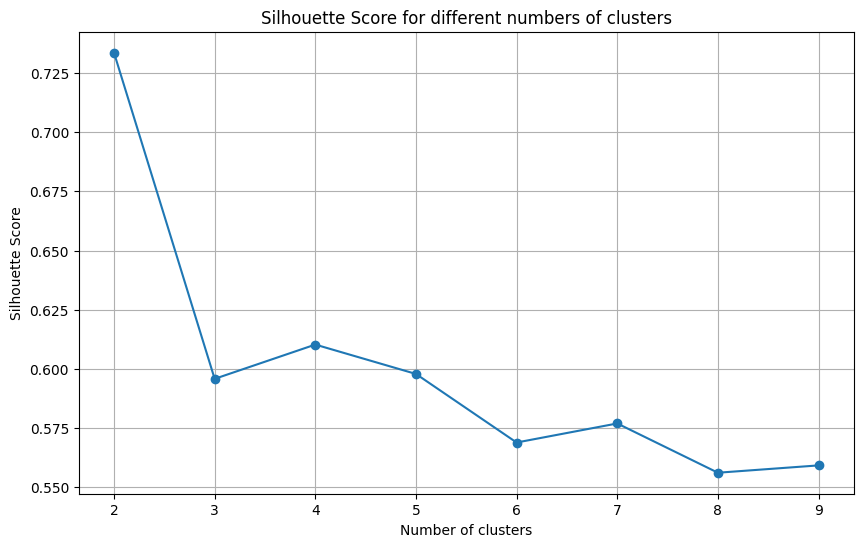

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = []
cluster_range = range(2, 10)  # Ubah range ini sesuai kebutuhan Anda

for n_clusters in cluster_range:
    km_cluster = KMeans(n_clusters = n_clusters, random_state = 26)
    cluster_labels = km_cluster.fit_predict(df_encoded)
    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 4. Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

### **Spectral**

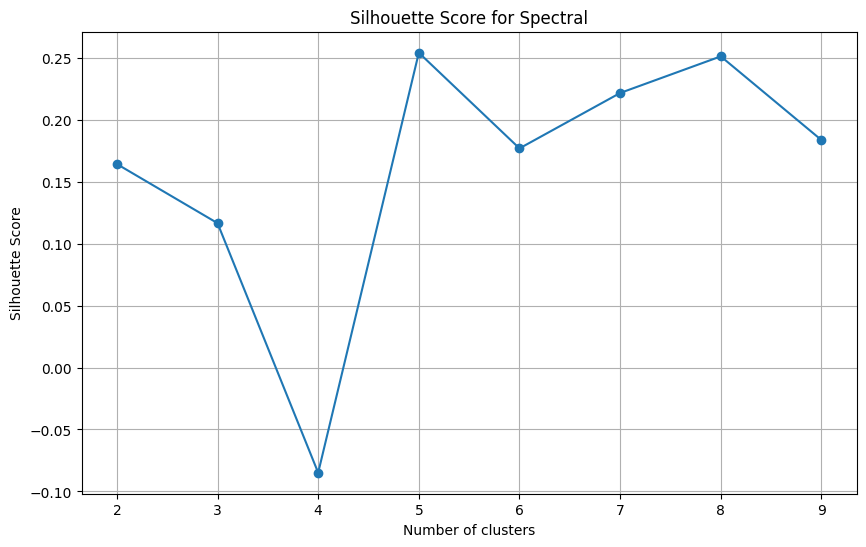

In [34]:
from sklearn.cluster import SpectralClustering
silhouette_scores = []
cluster_range = range(2, 10)  # Ubah range ini sesuai kebutuhan Anda

for n_clusters in cluster_range:
    spc_cluster = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=26)
    cluster_labels = spc_cluster.fit_predict(df_encoded)
    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Spectral')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

### **Agglomerative**

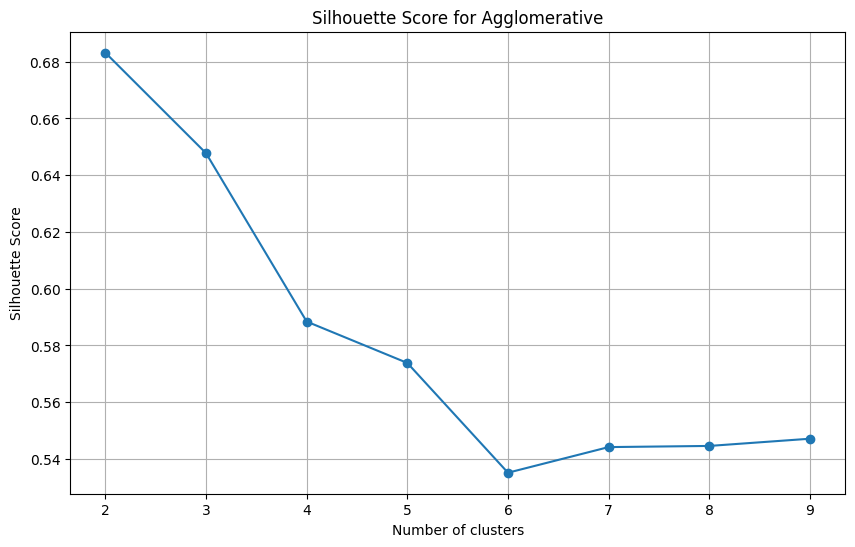

In [35]:
from sklearn.cluster import AgglomerativeClustering
silhouette_scores = []
cluster_range = range(2, 10)  # Ubah range ini sesuai kebutuhan Anda

for n_clusters in cluster_range:
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg_cluster.fit_predict(df_encoded)
    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Agglomerative')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

### **KMedoids**

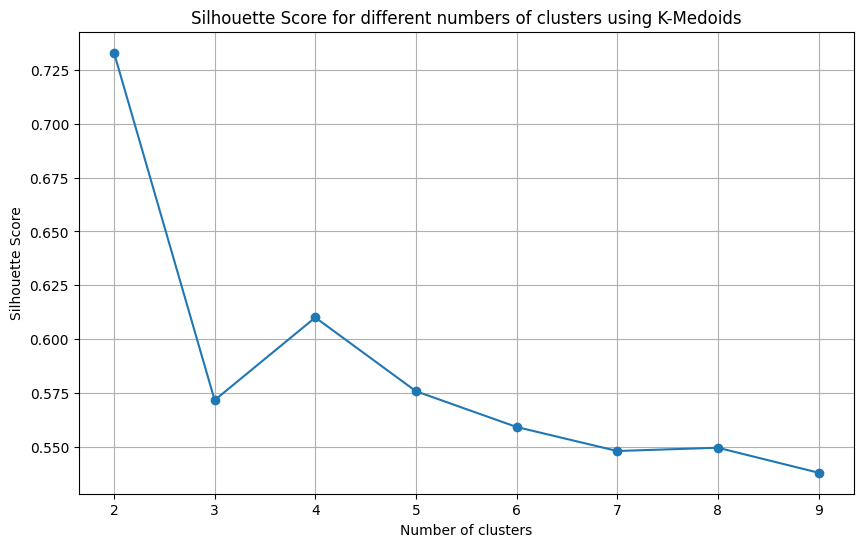

In [36]:
from sklearn_extra.cluster import KMedoids

silhouette_scores = []
cluster_range = range(2, 10)  # Ubah range ini sesuai kebutuhan Anda

for n_clusters in cluster_range:
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=26)
    cluster_labels = kmedoids.fit_predict(df_encoded)
    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for different numbers of clusters using K-Medoids')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

Berdasarkan grafik Sillhoutte Score untuk keempat model clustering yaitu K-Means, Spectral, Aglomerative Clustering, dan K-Medoids diperoleh hasil bahwa keempat model memiliki Silhoutte Score yang optimal pada sejumlah 2 cluster.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Jumlah cluster
n_clusters = 2

# 1. K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_encoded)
silhouette_kmeans = silhouette_score(df_encoded, kmeans_labels)

# 2. Spectral
spc_cluster = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=26)
spc_labels = spc_cluster.fit_predict(df_encoded)
silhouette_spc = silhouette_score(df_encoded, spc_labels)

# 3. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=n_clusters)
agglo_labels = agglo.fit_predict(df_encoded)
silhouette_agglo = silhouette_score(df_encoded, agglo_labels)

# 4. K-Medoids
kmedoids = KMedoids(n_clusters=n_clusters, random_state=26)
kmedoids_labels = kmedoids.fit_predict(df_encoded)
silhouette_kmedoids = silhouette_score(df_encoded, kmedoids_labels)

# Menampilkan hasil dalam bentuk tabel
results = pd.DataFrame({
    "Algorithm": ["K-Means", "Spectral", "Agglomerative","K-Medoids"],
    "Silhouette Score": [silhouette_kmeans, silhouette_spc, silhouette_agglo, silhouette_kmedoids]
})

# Format kolom angka jadi 4 desimal
results["Silhouette Score"] = results["Silhouette Score"].apply(lambda x: f"{x:.4f}")
print(results)


       Algorithm Silhouette Score
0        K-Means           0.7335
1       Spectral           0.1642
2  Agglomerative           0.6832
3      K-Medoids           0.7329


Dilakukan perbandingan hasil Sillhoutte Score pada 2-cluster di keempat model, dan diperoleh hasil terbaik adalah model KMeans.

In [38]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_encoded)

# Calculate Evaluation Metrics
silhouette_avg = silhouette_score(df_encoded, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(df_encoded, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(df_encoded, cluster_labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')

# Add cluster labels to the original DataFrame
df_encoded['Cluster'] = cluster_labels
df_encoded.head()

Silhouette Score: 0.7335341700394998
Davies-Bouldin Index: 0.4236480399787441
Calinski-Harabasz Index: 4117.970315121238


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,Cluster
0,19,27.90,0,16884.92,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1
1,18,33.77,1,1725.55,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1
2,28,33.00,3,4449.46,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1
3,33,22.70,0,21984.47,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1
4,32,28.88,0,3866.86,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1


Hasil clustering dengan **KMeans (n=2)** menunjukkan kualitas yang sangat baik, dengan **Silhouette Score sebesar 0.7335**, menandakan bahwa data dalam satu cluster cukup mirip dan terpisah dengan baik dari cluster lainnya. **Davies-Bouldin Index (0.4236)** yang rendah menunjukkan bahwa cluster tidak saling tumpang tindih secara signifikan, sementara **Calinski-Harabasz Index (4117.97)** yang cukup tinggi mengindikasikan bahwa cluster memiliki kepadatan tinggi dan jarak antar cluster cukup besar. Secara keseluruhan, kedua cluster yang terbentuk memiliki struktur yang jelas dan dapat diandalkan dalam analisis lebih lanjut.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [39]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

In [40]:
df_encoded['Cluster'].value_counts()

Cluster
1    1098
0     239
Name: count, dtype: int64

Visualisasi hasil menggunakan analisis PCA dengan memanfaatkan df_encoded (hasil preprocessing).

<function matplotlib.pyplot.show(close=None, block=None)>

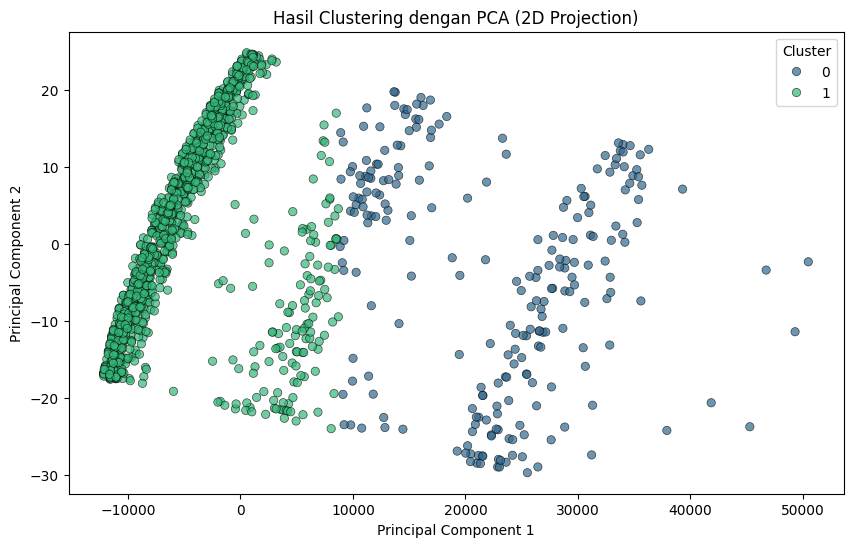

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded.drop(columns=['Cluster']))  # Hapus kolom Cluster sebelum PCA

# Konversi ke DataFrame untuk visualisasi
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_encoded['Cluster']

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=df_pca, alpha=0.7, edgecolor='k')

# Tambahkan judul
plt.title('Hasil Clustering dengan PCA (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show


Berdasarkan visualisasi hasil **KMeans Clustering (n=2)** yang direduksi ke dua dimensi menggunakan **PCA**, terlihat bahwa data terbagi menjadi dua cluster yang cukup jelas:

- **Cluster 0 (berwarna biru)** menunjukkan pola distribusi yang lebih tersebar di sepanjang sumbu **Principal Component 1** dengan nilai yang relatif lebih tinggi. Hal ini mengindikasikan bahwa cluster ini memiliki variasi yang lebih besar dalam fitur-fitur aslinya.
  
- **Cluster 1 (berwarna hijau)** tampak lebih terkonsentrasi dan cenderung berada pada rentang nilai **Principal Component 1** yang lebih rendah, menunjukkan karakteristik yang lebih homogen dibandingkan cluster 0.

🧭 Proyeksi ke dalam dua komponen utama oleh PCA berhasil membantu mengurangi dimensi data sekaligus memvisualisasikan perbedaan antara kelompok. Pemisahan antar cluster terlihat cukup jelas dalam ruang dua dimensi, yang mengindikasikan bahwa proses clustering menangkap struktur yang bermakna dari data awal.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [42]:
# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

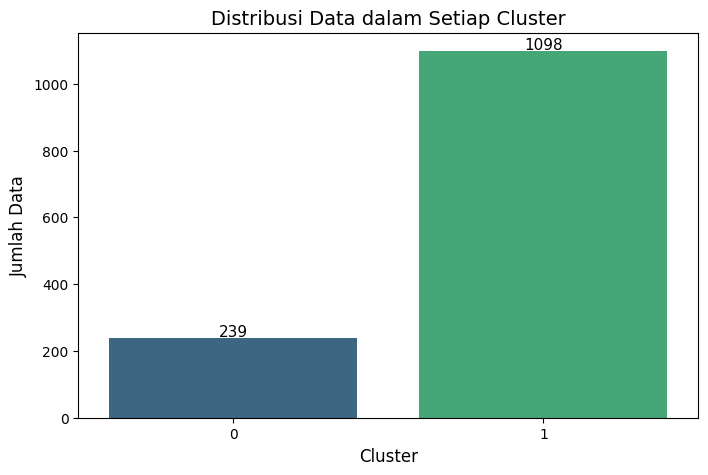

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah data di setiap cluster
cluster_counts = df['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Jumlah Data']

# Membuat barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Jumlah Data', data=cluster_counts, palette='viridis')

# Menambahkan judul dan label
plt.title('Distribusi Data dalam Setiap Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)

# Menampilkan nilai jumlah masing-masing cluster di atas batang
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 5, 
             int(p.get_height()), ha='center', fontsize=11)

plt.show()


In [44]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
 7   Cluster   1337 non-null   int32  
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 88.8+ KB


Fitur numerik yang digunakan: ['age', 'bmi', 'children', 'charges']


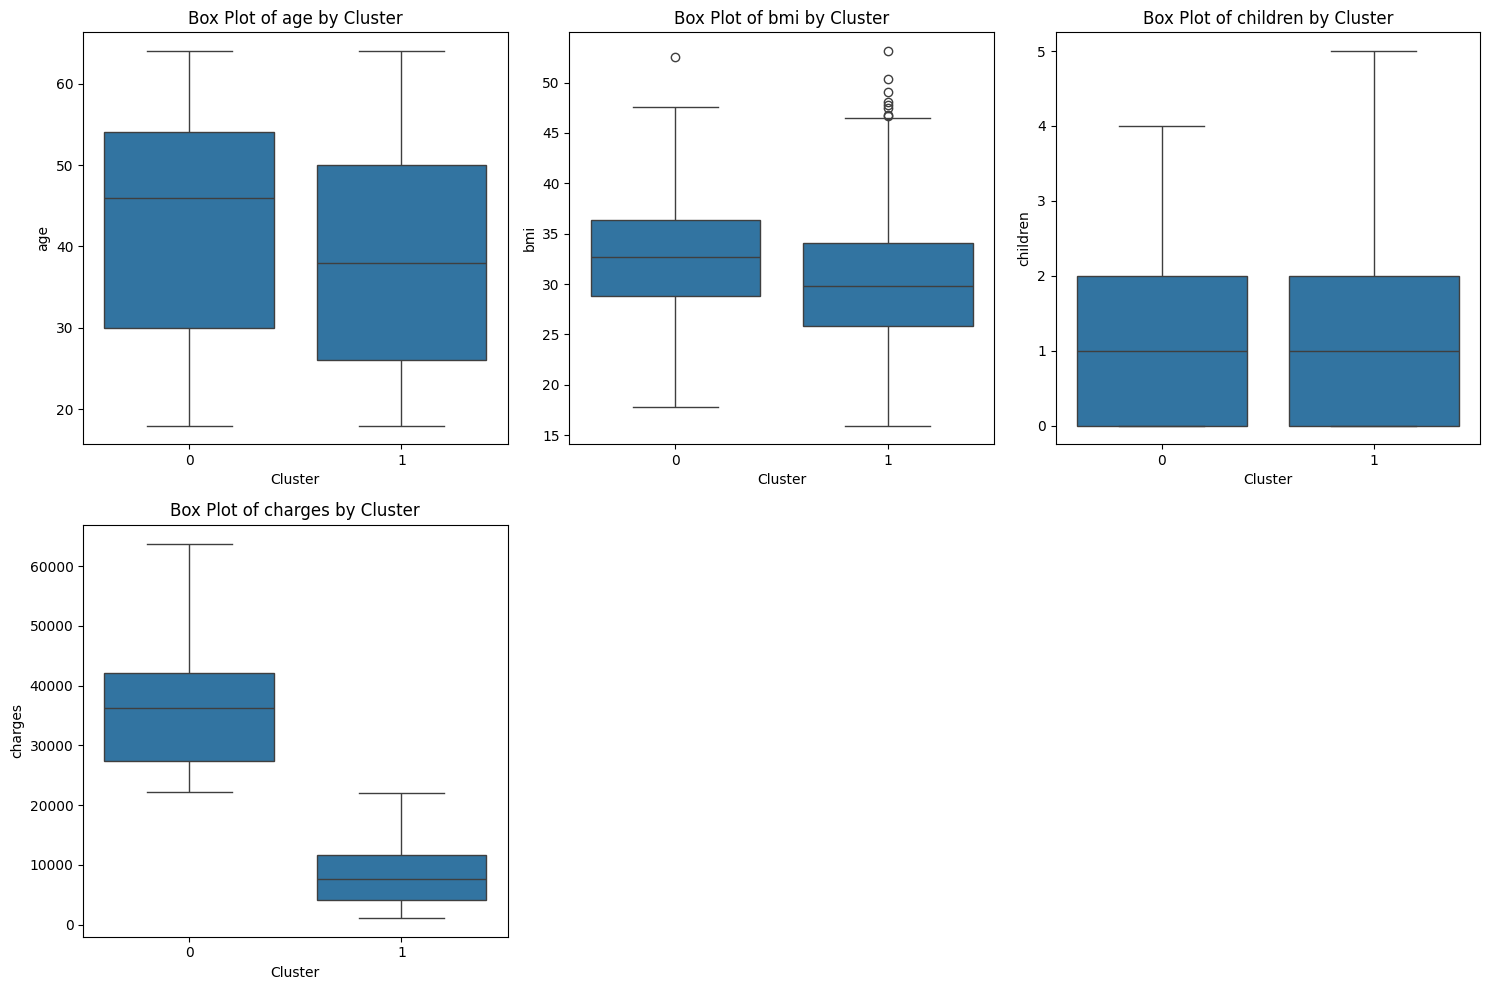

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan fitur numerik
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Cek apakah 'Cluster' ada dalam daftar fitur numerik sebelum menghapusnya
if 'Cluster' in num_features:
    num_features.remove('Cluster')

# Cetak daftar fitur numerik untuk verifikasi
print("Fitur numerik yang digunakan:", num_features)

# Tentukan jumlah baris dan kolom untuk subplot secara dinamis
n_features = len(num_features)
n_cols = 3
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)

# Membuat subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows)) 
axes = axes.flatten()

# Loop melalui fitur numerik dan plot berdasarkan Cluster
for i, var in enumerate(num_features):
    sns.boxplot(data=df, x='Cluster', y=var, ax=axes[i])
    axes[i].set_title(f'Box Plot of {var} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(var)

# Menghapus subplot kosong jika jumlah fitur kurang dari subplot yang dibuat
for j in range(len(num_features), len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


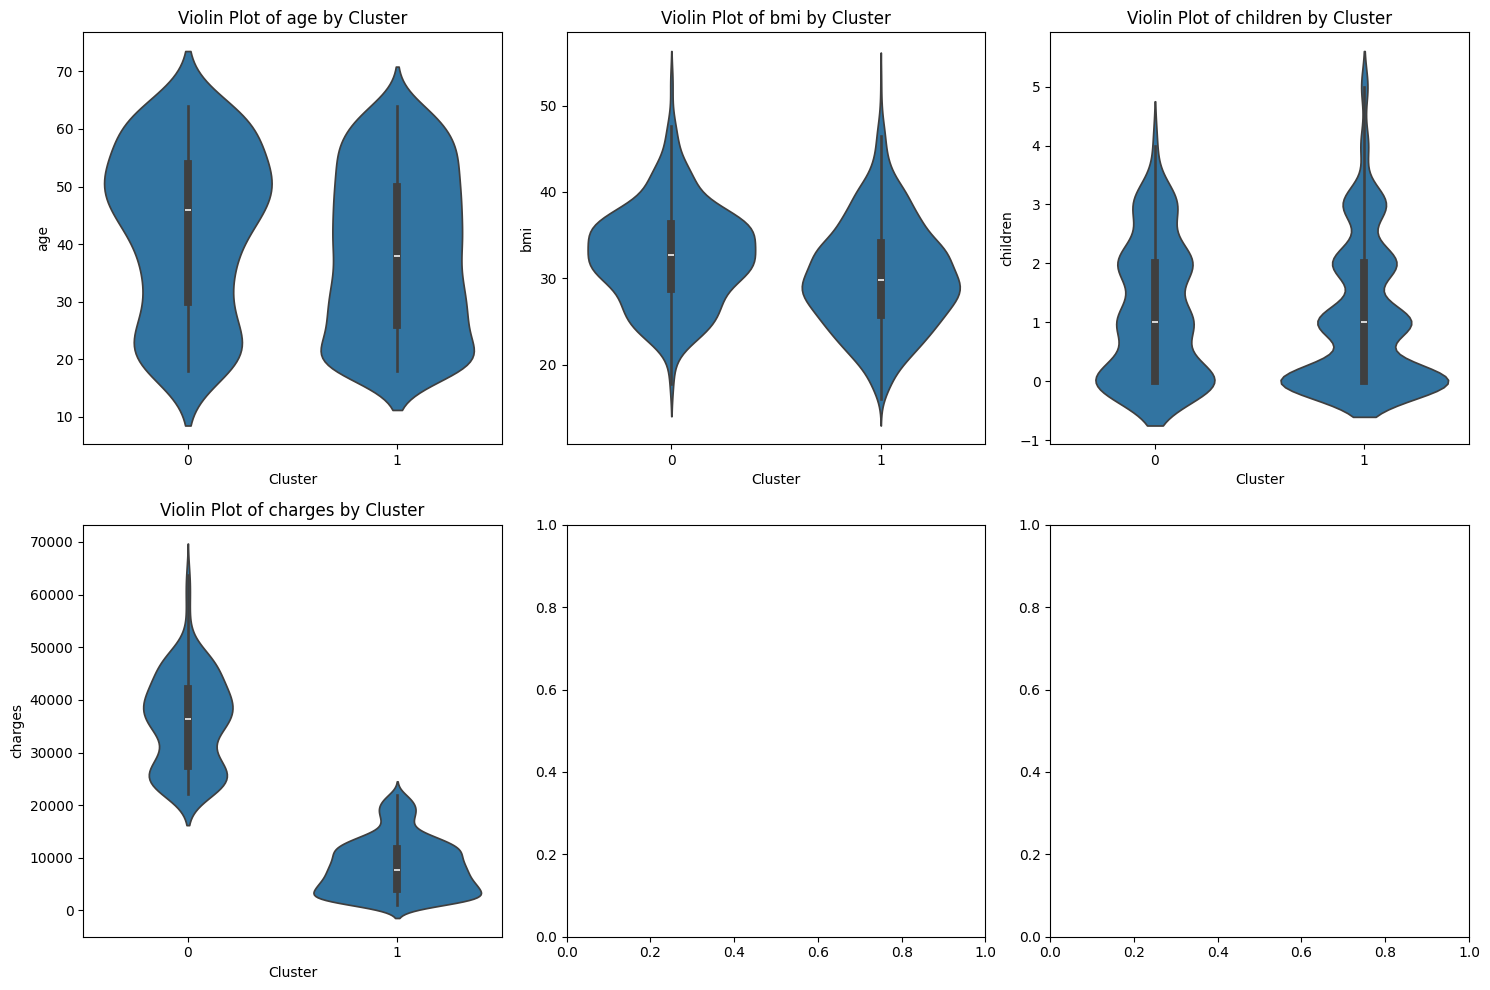

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows)) 
axes = axes.flatten()

for i, var in enumerate(num_features[:27]):  
    sns.violinplot(data=df, x='Cluster', y=var, ax=axes[i])
    axes[i].set_title(f'Violin Plot of {var} by Cluster')

plt.tight_layout()
plt.show()


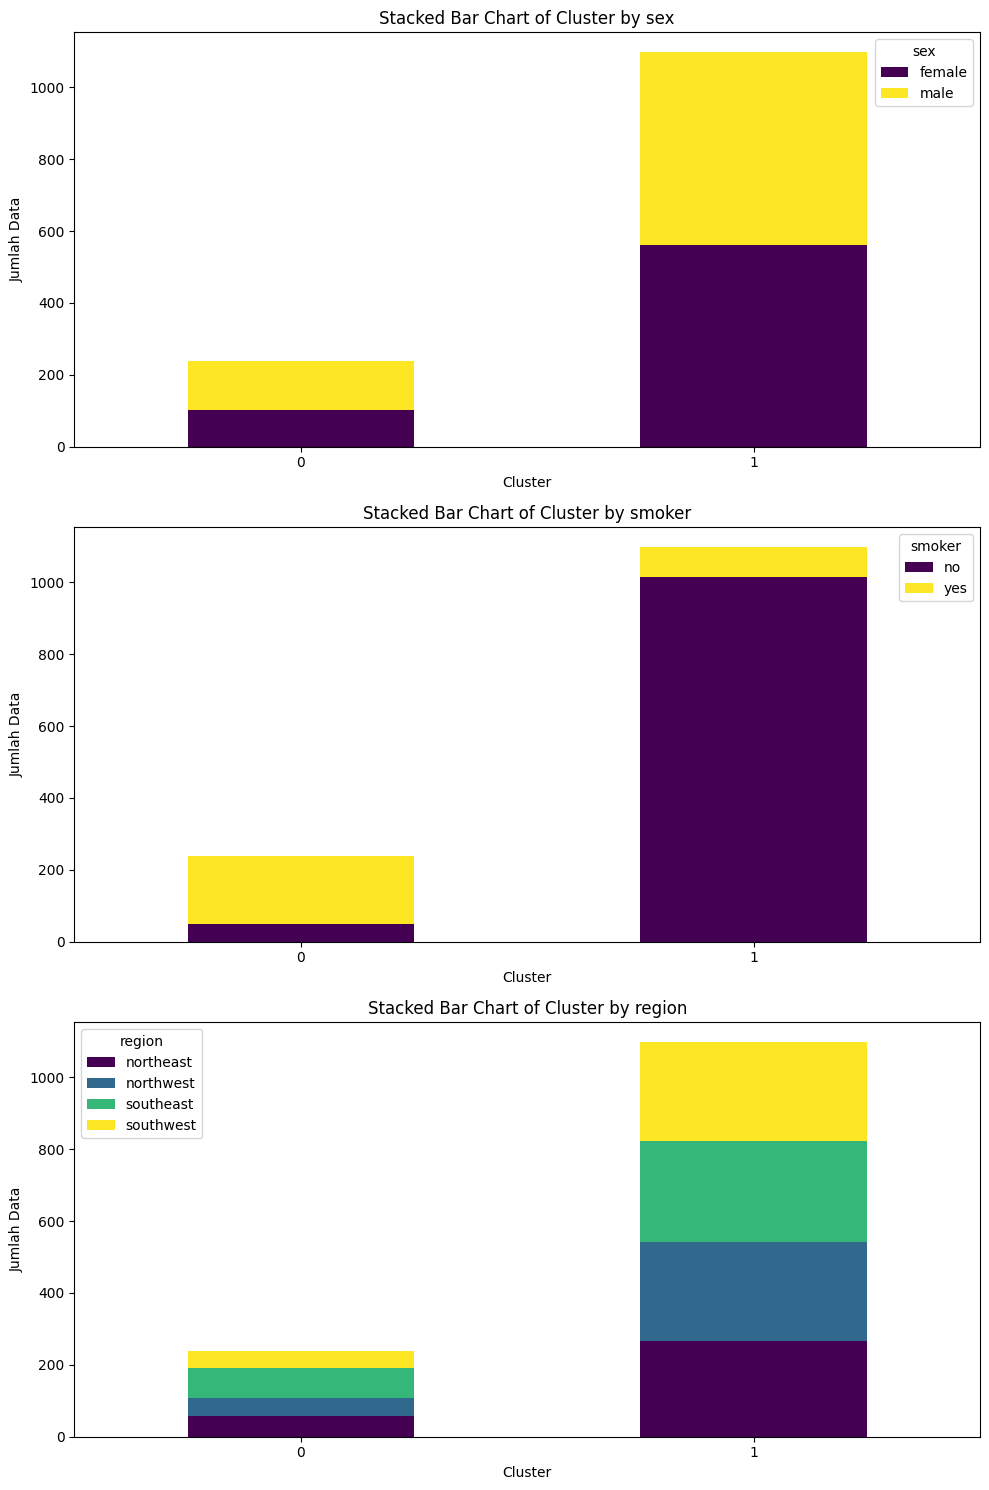

In [47]:
import matplotlib.pyplot as plt

# Loop melalui fitur kategorik dan buat stacked bar chart
fig, axes = plt.subplots(len(cat_features), 1, figsize=(10, 5 * len(cat_features)))

for i, var in enumerate(cat_features):
    # Hitung distribusi data berdasarkan cluster dan fitur kategorik
    cluster_counts = df.groupby(['Cluster', var]).size().unstack(fill_value=0)
    
    # Plot stacked bar chart
    cluster_counts.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
    axes[i].set_title(f'Stacked Bar Chart of Cluster by {var}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Jumlah Data')
    axes[i].legend(title=var)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [57]:
import pandas as pd
from scipy.stats import mode


# Buat dict kosong untuk simpan hasil
cluster_descriptions = {}

# Loop untuk tiap klaster
for cluster_id, group in df.groupby('Cluster'):
    desc = pd.DataFrame(index=group.columns)
    desc['type'] = group.dtypes
    desc['count'] = group.count()
    desc['nunique'] = group.nunique()
    desc['%unique'] = desc['nunique'] / len(group) * 100
    desc['null'] = group.isnull().sum()
    desc['%null'] = desc['null'] / len(group) * 100
    
    # Gabung statistik numerik
    stat_desc = group.describe().T.drop('count', axis=1)
    desc = pd.concat([desc, stat_desc], axis=1)
    
    # Variance (khusus numerik)
    desc['variance'] = group[num_features].var()
    
    # Mode (ambil yang pertama jika lebih dari satu)
    desc['mode'] = group.mode().iloc[0]
    
    cluster_descriptions[cluster_id] = desc


#### Cluster 0

In [55]:
# Tampilkan hasil untuk klaster 0
cluster_descriptions[0].sort_values(by=['type', 'null']).style\
    .background_gradient(cmap='YlOrBr')\
    .bar(subset=['mean'], color='green')\
    .bar(subset=['max'], color='red')\
    .bar(subset=['min'], color='pink')

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max,variance,mode
Cluster,int32,239,1,0.418410,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,0.000000
age,int64,239,47,19.665272,0,0.000000,42.765690,14.275630,18.000000,30.000000,46.000000,54.000000,64.000000,203.793608,19.000000
children,int64,239,5,2.092050,0,0.000000,1.167364,1.121421,0.000000,0.000000,1.000000,2.000000,4.000000,1.257586,0.000000
bmi,float64,239,188,78.661088,0,0.000000,32.714059,5.593823,17.765000,28.785000,32.700000,36.342500,52.580000,31.290858,31.350000
charges,float64,239,239,100.000000,0,0.000000,35827.855796,8864.633007,22144.032000,27360.973425,36307.798300,42118.375450,63770.428010,78581718.347249,22144.032000
sex,object,239,2,0.836820,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,male
smoker,object,239,2,0.836820,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,yes
region,object,239,4,1.673640,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,southeast


#### Cluster 1

In [56]:

# Tampilkan hasil untuk klaster 1
cluster_descriptions[1].sort_values(by=['type', 'null']).style\
    .background_gradient(cmap='YlOrBr')\
    .bar(subset=['mean'], color='green')\
    .bar(subset=['max'], color='red')\
    .bar(subset=['min'], color='pink')

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max,variance,mode
Cluster,int32,1098,1,0.091075,0,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000
age,int64,1098,47,4.280510,0,0.000000,38.450820,13.880590,18.000000,26.000000,38.000000,50.000000,64.000000,192.670779,18.000000
children,int64,1098,6,0.546448,0,0.000000,1.080146,1.223049,0.000000,0.000000,1.000000,2.000000,5.000000,1.495850,0.000000
bmi,float64,1098,507,46.174863,0,0.000000,30.217099,6.117150,15.960000,25.800000,29.830000,34.100000,53.130000,37.419529,32.300000
charges,float64,1098,1098,100.000000,0,0.000000,8370.972580,5165.201652,1121.873900,4090.783162,7625.811500,11740.756710,21984.470610,26679308.107934,1121.873900
sex,object,1098,2,0.182149,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,female
smoker,object,1098,2,0.182149,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,no
region,object,1098,4,0.364299,0,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,southeast


# **Interpretasi Hasil Clustering pada Dataset Insurance**

Dataset ini mencakup pasien sakit kritis di AS, dan telah diklasifikasikan menjadi **2 cluster** berdasarkan atribut seperti usia, BMI, biaya perawatan, dan kebiasaan merokok. Hasil clustering menunjukkan perbedaan yang jelas antar kelompok dalam hal demografi dan risiko kesehatan.

---

## **Cluster 0: Pasien Risiko Tinggi (Mayoritas Perokok, Biaya Tinggi)**  
- **Usia (age)**: Rata-rata **42,76 tahun**, dengan sebaran lebih tinggi dari cluster lain.  
- **BMI**: Rata-rata **32,7**, menunjukkan **kecenderungan obesitas**.  
- **Biaya Perawatan (charges)**: Rata-rata adalah **$35.827**, jauh lebih tinggi dari Cluster 1.  
- **Status Merokok**: Hampir semua adalah **perokok aktif** (`smoker_yes ≈ 1`).  
- **Jenis Kelamin**: Proporsi hampir seimbang pria–wanita.  
- **Wilayah**: Proporsi hampir seimbang dan tidak menunjukkan dominasi wilayah tertentu.

📌 **Interpretasi**: Cluster ini berisi pasien dengan **risiko tinggi**, baik dari segi usia, status merokok, maupun biaya perawatan. Cocok untuk pendekatan pencegahan dan monitoring intensif.

---

## **Cluster 1: Pasien Risiko Rendah (Mayoritas Non-Perokok)**  
- **Usia (age)**: Rata-rata **38,45 tahun**, lebih muda secara signifikan dari Cluster 0.  
- **BMI**: Rata-rata **30,217**, masih dalam kisaran overweight tapi lebih rendah.  
- **Biaya Perawatan (charges)**: Rata-rata hanya **$8.370**, jauh lebih rendah.  
- **Status Merokok**: Mayoritas adalah **non-perokok** (`smoker_no ≈ 1`).  
- **Jenis Kelamin**: Proporsi hampir seimbang pria–wanita.  
- **Wilayah**: Proporsi hampir seimbang dan tidak menunjukkan dominasi wilayah tertentu.

📌 **Interpretasi**: Cluster ini mewakili **pasien dengan risiko lebih rendah**, baik dari segi kesehatan maupun biaya. Potensi prognosis lebih baik.

---

## **Kesimpulan dan Rekomendasi**

### 1. **Perbandingan Kinerja Model**
- Clustering berhasil membagi pasien menjadi dua kelompok **dengan ciri khas yang jelas**, terutama berdasarkan status merokok, usia, dan biaya.
- **Distribusi variabel bersifat tidak tumpang tindih**, menunjukkan performa model cukup baik dalam segmentasi.

### 2. **Identifikasi Kelemahan**
- **Variabel wilayah dan jenis kelamin** tidak terlalu berkontribusi dalam pembentukan cluster, terlihat dari distribusi yang seragam.
- Tidak diketahui apakah outcome klinis (misal: survival rate) dimasukkan atau tersedia sebagai acuan validasi.

### 3. **Rekomendasi Tindakan Lanjutan**
- **Integrasikan data klinis** seperti hasil lab atau survival rate untuk meningkatkan kualitas segmentasi.
- Gunakan hasil clustering untuk **penyesuaian premi asuransi** atau **intervensi kesehatan publik** pada pasien berisiko tinggi.
- Pertimbangkan validasi model dengan **metode silhouette score atau Davies-Bouldin index** untuk kuantifikasi pemisahan cluster.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

Data yang disimpan adalah df_encoded (hasil preprocessing) untuk memudahkan dalam klasifikasi, sehingga tidak perlu melakukan preprocessing ulang.

In [48]:
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,Cluster
0,19,27.90,0,16884.92,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1
1,18,33.77,1,1725.55,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1
2,28,33.00,3,4449.46,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1
3,33,22.70,0,21984.47,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1
4,32,28.88,0,3866.86,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1


In [49]:
df_encoded.to_csv('insurance_clustered.csv', index=False)